### Spatial sampling of our tweet fetching method

**Conclusions:**

* sampling with 40 km radius buffers around the county centers is generally fine
* oversampling in the eastern US should be reduced to speed things up
* undersampling in the western US is rather unproblematic. we capture the most
important metropolitan areas
* we might need to manually sample a bit more in one region in Texas and around LA

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt

sns.set_style("ticks")

#### read county_centers.csv data from Niklas

In [4]:
df = pd.read_csv("../data/processed/county_geodata/county_centers_cleaned.csv")
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry="geometry")
gdf

,id,state,fips,county,county_seat,population,land_area_km2,land_area_mi2,water_area_km2,water_area_mi2,total_area_km,total_area_mi2,latitude,longitude,conus,geometry
0,1,AL,1001,Autauga,Prattville,54571,1539.582,594.436,25.776,9.952,1565.358,604.388,32.536382,-86.644490,True,POINT (-86.64449 32.53638)
1,2,AL,1003,Baldwin,Bay Minette,182265,4117.522,1589.784,1133.190,437.527,5250.712,2027.311,30.659218,-87.746067,True,POINT (-87.74607 30.65922)
2,3,AL,1005,Barbour,Clayton,27457,2291.819,884.876,50.865,19.639,2342.684,904.515,31.870670,-85.405456,True,POINT (-85.40546 31.87067)
3,4,AL,1007,Bibb,Centreville,22915,1612.481,622.582,9.289,3.587,1621.770,626.169,33.015893,-87.127148,True,POINT (-87.12715 33.01589)
4,5,AL,1009,Blount,Oneonta,57322,1669.962,644.776,15.157,5.852,1685.119,650.628,33.977448,-86.567246,True,POINT (-86.56725 33.97745)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,3139,WY,56037,Sweetwater,Green River,43806,27004.897,10426.649,166.887,64.436,27171.784,10491.085,41.660339,-108.875676,True,POINT (-108.87568 41.66034)
3139,3140,WY,56039,Teton,Jackson,21294,10347.984,3995.379,572.266,220.953,10920.250,4216.332,44.049321,-110.588102,True,POINT (-110.58810 44.04932)
3140,3141,WY,56041,Uinta,Evanston,21118,5390.450,2081.264,16.342,6.310,5406.791,2087.574,41.284726,-110.558947,True,POINT (-110.55895 41.28473)
3141,3142,WY,56043,Washakie,Worland,8533,5797.815,2238.549,10.762,4.155,5808.577,2242.704,43.878831,-107.669052,True,POINT (-107.66905 43.87883)


#### read and plot data on the 1000 largest (in terms of pop size) cities in the US and convert county data to geodataframe

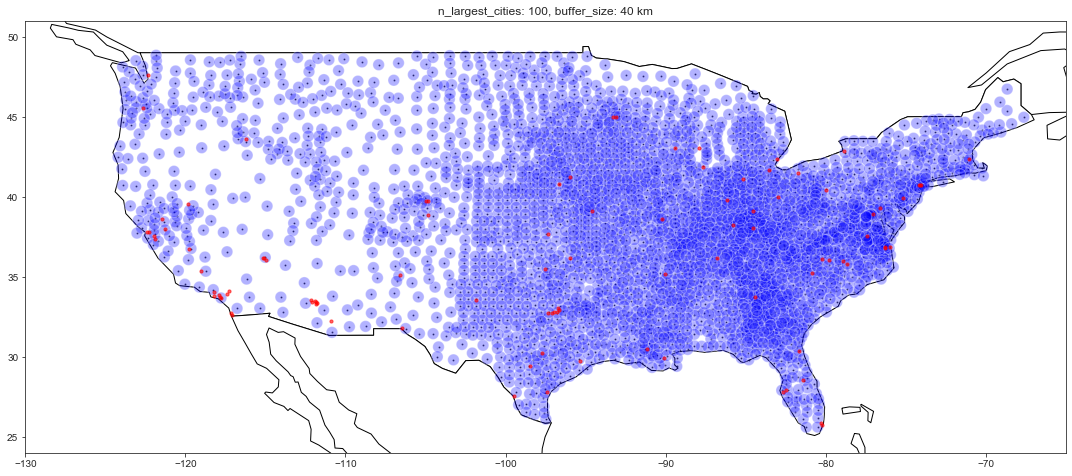

In [3]:
# filter out non-conus counties for the plots
gdf = gdf[gdf.conus == True]

# read other spatial data sets
cities = gpd.read_file("data/1000_largest_cities_USA/1000-largest-us-cities-by-population-with-geographic-coordinates.shp")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# plot
n_largest = 100
city_sample = cities.sort_values("rank").head(n_largest)

# restrict to North America
ax = world[world['continent'] == "North America"].plot(
    color='white', edgecolor='black', figsize=(15,10))

# plot county centroids
gdf.plot(ax=ax, color='black', markersize=1, alpha=.6)

# ~ 40 km buffers. units are in degrees of longitude and latitude.
# remember: one degree (1°) near the equator is equivalent to about 111 km
# thus,
km2deg = 1/111
buffer_size_km = 40
buffer_size_deg = buffer_size_km * km2deg
gdf = gdf.buffer(distance=buffer_size_deg)

# plot buffer radii
gdf.plot(ax=ax, color='blue', markersize=1, alpha=.3)

# plot cities
city_sample.plot(ax=ax, color='red', markersize=10, alpha=.6)

# bbox for plot
ax.set_xlim(-130, -65)
ax.set_ylim(24, 51)

ax.set_title("n_largest_cities: {}, buffer_size: {} km".format(n_largest, buffer_size_km))
plt.tight_layout()
plt.show()
